# IN4050: Classification by *k*NN
## Introduction
The goal of this week is to get a first experience with supervised classification.
In particular, we will get familiar with how to set up, run and evaluate experiments.
We will also implement the *k*NN-algorithm using pure python.

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Dataset
To do machine learning, we need data.
To make it simple, we use scikit-learn to construct a synthetic dataset with
- 2 classes
- 2 numerical features
- 200 items

We will use `X`-s for the input values and `t`-s for the target values. Since we will be using pure python in this exercise set, we transform the data from numpy arrays, like `X_np`, to lists, like `X1`.

Don't worry about the magic recipe for how we cook the data for now!

In [285]:
from sklearn.datasets import make_blobs
X_np, t_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X1 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t1 = [t_np[i] for i in range(X_np.shape[0])]

This is a general form for representing data we will use a lot in this course. We store the features in one list and the labels in another list of the same length. For example, y[14] is the label the dataset ascribes to the input X[14], where X[14] is a pair (two-tuple) of numbers.

(Later on we will use numpy arrays and not lists, e.g., the X_np, t_np, above.)

We can then take a look at the training set using scatterplot.

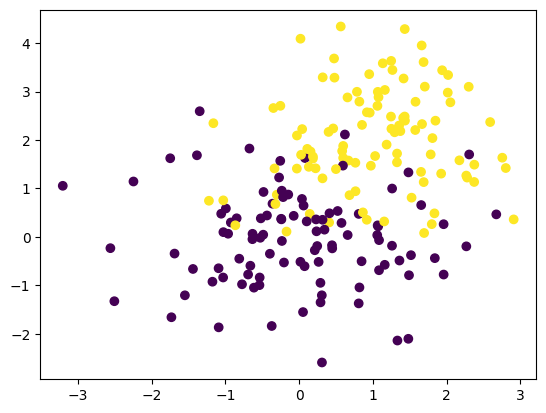

In [286]:
plt.scatter(X_np[:, 0], X_np[:, 1], c=t_np)

To add a legend (i.e., naming the classes) we sort the data into the two classes before plotting. We may then use the `plot` command.

In [287]:
def show(X, y, marker='.'):
    labels = set(y)
    cl = {lab : [] for lab in labels}
    # cl[lab] shall contain the datapoints labeled lab
    for (a, b) in zip(X, y):
        cl[b].append(a)
    for lab in labels:
        plt.plot([a[0] for a in cl[lab]], [a[1] for a in cl[lab]], 
                 marker, label="class {}".format(lab))
    plt.legend()

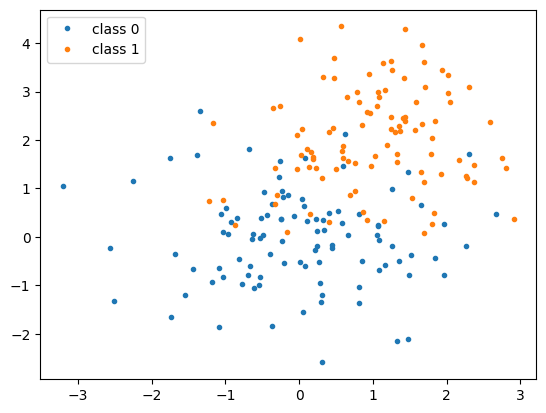

In [288]:
show(X1, t1)

## *k*NN
We will now implement the *k*NN algorithm.
We first need to calculate the distance between two points.

There are, of course, methods, e.g. in numpy, that are more than willing to do this for us. But we are here to learn. So we implement it ourselves.

### Exercise I: Distance
Implement a (L2-) distance function. It should work for points in *n*-dimensional space for any integer *n*>0. Check that dist((3,4,0),(0,0,12)) is 13.

In [289]:
from math import sqrt


def distance_L2(a,b):
    "Calculate and return the L2-distance between a and b"
    sum = 0
    assert(len(a) == len(b)), print(f"{len(a)} != {len(b)}")

    # Amount of elements in list 
    n = len(a)

    # Adding each part 
    for i in range(0,n):
        sum += (b[i] - a[i])**2
    
    # Square root at the end
    return sqrt(sum)

In [290]:
assert distance_L2((3,4,0),(0,0,12)) == 13

### Exercise II: Majority class
The next thing we need is a way to determine the majority class from a set of votes. Implement a procedure which takes a list as argument and returns the majority class. 

In [291]:
from collections import Counter

def majority(a):
    """Return the majority class of a
    
    For example majority([0,1,1,1,0]) should return 1"""
    return Counter(a).most_common()[0][0]

#### Hint: Counter
For this we can use the Counter method. If you are not familiar with Counter, experiment with it to see how it works.

In [292]:
from collections import Counter
print("Example")
s = ['a', 'b', 'c', 'b', 'c']
counts = Counter(s)
print(s)
print(counts)
print(counts.most_common())

Example
['a', 'b', 'c', 'b', 'c']
Counter({'b': 2, 'c': 2, 'a': 1})
[('b', 2), ('c', 2), ('a', 1)]


In [293]:
# test 
s = [0,1,1,1,0]

assert majority(s) == 1

### Exercise III: the *k*NN algorithm
We will use a class for implementing the classifier. We have chosen a format that we can later reuse for various other classifier algorithms. The format is inspired by scikit-learn. We will have a superclass where we can put methods common to the various classification algorithms.

The class will have three methods; one `init` where we set the hypermarameters, one `fit` where the training takes place, and one `predict` which predicts the class of a list of new items after we have trained the classifier.

The training will have the form
```python
cls = PykNNClassifier(k=5) # OR some other number, default 3
cls.fit(X_train, t_train)
```

We can then classify a new item by e.g.
```python
p = (1,1)
cls.predict([p])
```

Implement the `predict` method.

In [294]:
class PyClassifier():
    """Common methods to all python classifiers --- if any
    
    Nothing here yet"""

In [295]:
class PykNNClassifier(PyClassifier):
    """kNN classifier using pure python representations"""
    
    def __init__(self, k=3, dist=distance_L2):
        self.k = k
        self.dist = dist
        
    def fit(self, X_train, t_train):
        X_train = [[x for x in xx] for xx in X_train]
        t_train = [t for t in t_train]
        self.X_train = X_train
        self.t_train = t_train

    def predict_one(self, a):
        # Calculate all distances for all datasets
        # Store as a tuple, where the second value, is the class of the given distance
        distances = [(self.dist(a,X), y) for (X, y) in zip(self.X_train, self.t_train)]

        # Sort the distances 
        distances.sort()

        # Get the predicted classes for the first k closest distances
        predictors = [c for (_, c) in distances[0: self.k]]

        # Return the majority of the predictor 
        return majority(predictors)
    
    def predict(self, a):
        return [self.predict_one(el) for el in a]

## Experiments and evaluation
To check how good the classifier is, we cannot consider singular datapoints. 
We have to see how the classifier performs on a larger test set.
With our synthetic training data, we can make a test set in a similar way.

We follow the same recipe as for the training set, but observe that we use a different *random_state* to get a set different from the training set.

In [296]:
X_np, t_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)
X2 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t2 = [t_np[i] for i in range(X_np.shape[0])]

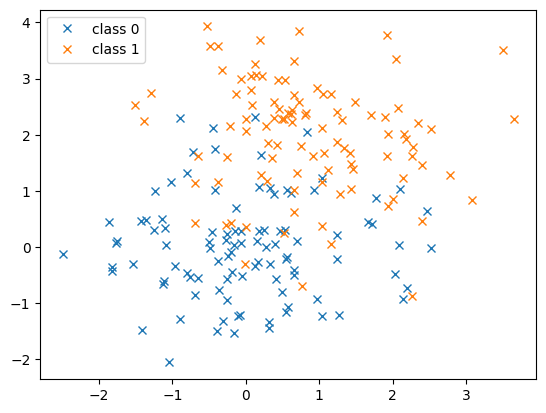

In [297]:
show(X2, t2, 'x')

### Exercise IV: Accuracy
There are several different evaluation measures that can be used, and we will see a couple of them the coming weeks. For today, we only consider the simple *accuracy*, the proportion of items classified correctly.

Implement a function `accuracy()`. It should take two arguments, where each is a list of labels and compare the two and return a numerical value for the accuracy. We will apply it to measure the accuracy of the classifier `cls` as follows:

```python
accuracy(cls.predict(X_test), t_test)
```

Test it on X2, t2 when trained on X1, t1 for various values of *k*.
Let *k* be any odd integer below 20. Plot the results.

Beware that there is no *k* which is the best for all datasets. It varies with the dataset. To decide on the best *k* for a specific dataset, we should use a separate development test set to determine the best *k*. Then we fix this *k* and test on the final test set. 

In [298]:
# Evaluation of the model 
def accuracy(y, t):
    # The amount of correctly predicted values for the dataset
    equal = len([(predicted, actual) for (predicted, actual) in zip(y, t) if predicted == actual])

    # Return the rate of correctly predicted values 
    return equal / len(t)

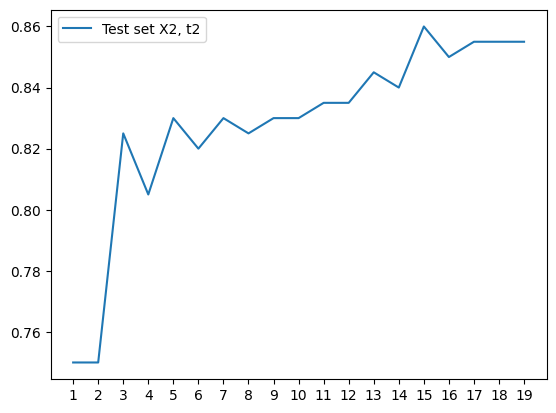

In [299]:
# Plotting for different K values
k_range = range(1, 20, 1)
accuracies = []

for k_curr in k_range:
    # Create the classifier
    cl = PykNNClassifier(k_curr)

    # Fit the model by using the first set as training set 
    cl.fit(X_train=X1, t_train=t1)

    # Append predicted value
    accuracies.append(accuracy(cl.predict(X2), t2))


# Plot the graph
plt.plot(k_range, accuracies, label="Test set X2, t2")
plt.xticks(k_range)
plt.legend()


### Exercise V: Variation

One should be cautious drawing too strong conclusions from an experiment like this. Check whether you get the same result with a different random test set drawn from the same distribution.

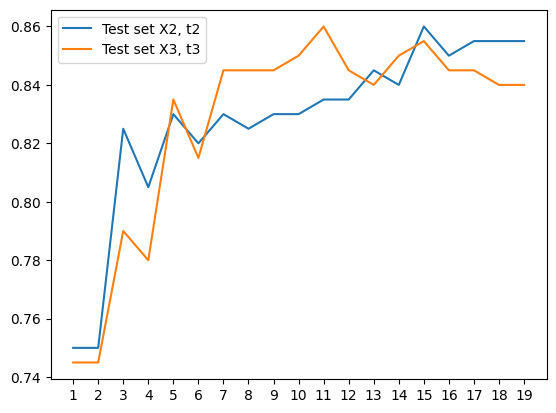

In [303]:
# Checking with another dataset, this time with another random state
X_np, t_np = make_blobs(n_samples=200, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=1023)
X3 = [(X_np[i,0], X_np[i,1]) for i in range(X_np.shape[0])]
t3 = [t_np[i] for i in range(X_np.shape[0])]


# Plotting for different K values
k_range = range(1, 20, 1)
accuracies2 = []
accuracies3 = []

for k_curr in k_range:
    # Create the classifier
    cl = PykNNClassifier(k_curr)

    # Fit the model by using the first set as training set 
    cl.fit(X_train=X1, t_train=t1)

    # Append predicted value
    accuracies2.append(accuracy(cl.predict(X2), t2))
    accuracies3.append(accuracy(cl.predict(X3), t3))


# Plot the graph
plt.plot(k_range, accuracies2, label="Test set X2, t2")
plt.plot(k_range, accuracies3, label="Test set X3, t3")
plt.xticks(k_range)
plt.legend()


### Exercise VI: Confusion matrix

Implement a procedure for calculating a confusion matrix for a classifier and try it on one of the runs above

In [308]:
# Implement a confusion matrix 
def cf_matrix(predicted, actual):
    table = np.zeros((2,2))
    for p,g in zip(predicted, actual):
        table[int(p), g] +=1
    return table


def print_table(table):
    print(28*" "+"actual")
    print("{:20}|{:>9}|{:>9}|".format(" ","neg", "pos"))
    print(10*" "+30*"-")
    print("{:10}{:10}|{:9}|{:9}|".format(" ","neg",table[0,0], table[0,1]))
    print("predicted "+30*"-")
    print("{:10}{:10}|{:9}|{:9}|".format(" ","pos",table[1,0], table[1,1]))
    print(10*" "+30*"-")


cls = PykNNClassifier(k=5)
cls.fit(X1, t1)
cf_m = cf_matrix(cls.predict(X2), t2)
print_table(cf_m)

                            actual
                    |      neg|      pos|
          ------------------------------
          neg       |     82.0|     16.0|
predicted ------------------------------
          pos       |     18.0|     84.0|
          ------------------------------


Extra. Using it to calculate the accuracy 

In [311]:
def cf_matrix_accuracy(predicted, actual):
    table = np.zeros((2,2))
    for p,g in zip(predicted, actual):
        table[int(p), g] +=1
    
    table_sum = table[0,0] + table[0,1] + table[1,0] + table[1,1]
    diagonal_sum = table[0,0] + table[1,1]

    print(f"Diag: {diagonal_sum}, table sum : {table_sum}\n")
    accuracy = diagonal_sum / table_sum
    print(f"Accuracy: {accuracy}\n")

    print_table(table)


cls = PykNNClassifier(k=5)
cls.fit(X1, t1)
cf_matrix_accuracy(cls.predict(X2), t2)

Diag: 166.0, table sum : 200.0

Accuracy: 0.83

                            actual
                    |      neg|      pos|
          ------------------------------
          neg       |     82.0|     16.0|
predicted ------------------------------
          pos       |     18.0|     84.0|
          ------------------------------
